# Linear Regression Assignment


Name: <B>Jallepalli Prerna </B>

Operating System:<B> Ubuntu </B>

Date: <B> 20/01/2020</B>

Time: <B> 23:30:00 </B>


<h3> Other related Instructions </h3>

-- All files are extracted from the same folder.
There is description of each step written after every code cell.

-- For solving rest of the questions mentioned in the assignment, created the dataframes based on top of these 3 main dataframes.

-- The Questions related to the Assignment are in the cell containing <b> Questions </b> as the heading.

<b>! Important: </b>

-- <b>As Ubuntu Operating System is used, please look over Partern Matching in case of Part-1B as file path is a 
lot different as compared to Windows OS </b>



## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 



## Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 



### Importing the libraries

All the necessary libraries are imported, each library has a following commented line stating the using of the library in this assignment

In [1]:
import pandas as pd                   
# Pandas library helps in extracting the data from csv or excel files 
#into the dataframe and then further manipulating the data according to the necessary format

import numpy as np
# Numpy library helps in statistical calculation and also ploting the best fit line for each state in the assignment

import matplotlib.pyplot as plt
# Matplotlib is a visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import seaborn as sns
# Seaborn is another visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import glob   
# To extract all the files in a folder based on Pattern matching 

import math
# Math library is used to do some basic mathematical operations like square roots etc.

%matplotlib inline
# The above command is a magical command for ploting graphs in jupyter notebook

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### To Install or Update Packages for running this assignment

!pip install -U seaborn

!pip install glob



## Data Extraction, Preperation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 


In [3]:
dataset = pd.read_csv("CarPrice_Assignment.csv")

#### About the dataset

In [4]:
print("Shape of the dataset: ", dataset.shape)
print("Info of dataset: ", dataset.info())
print("Description of the dataset", dataset.describe())
dataset.head()

Shape of the dataset:  (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower         

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


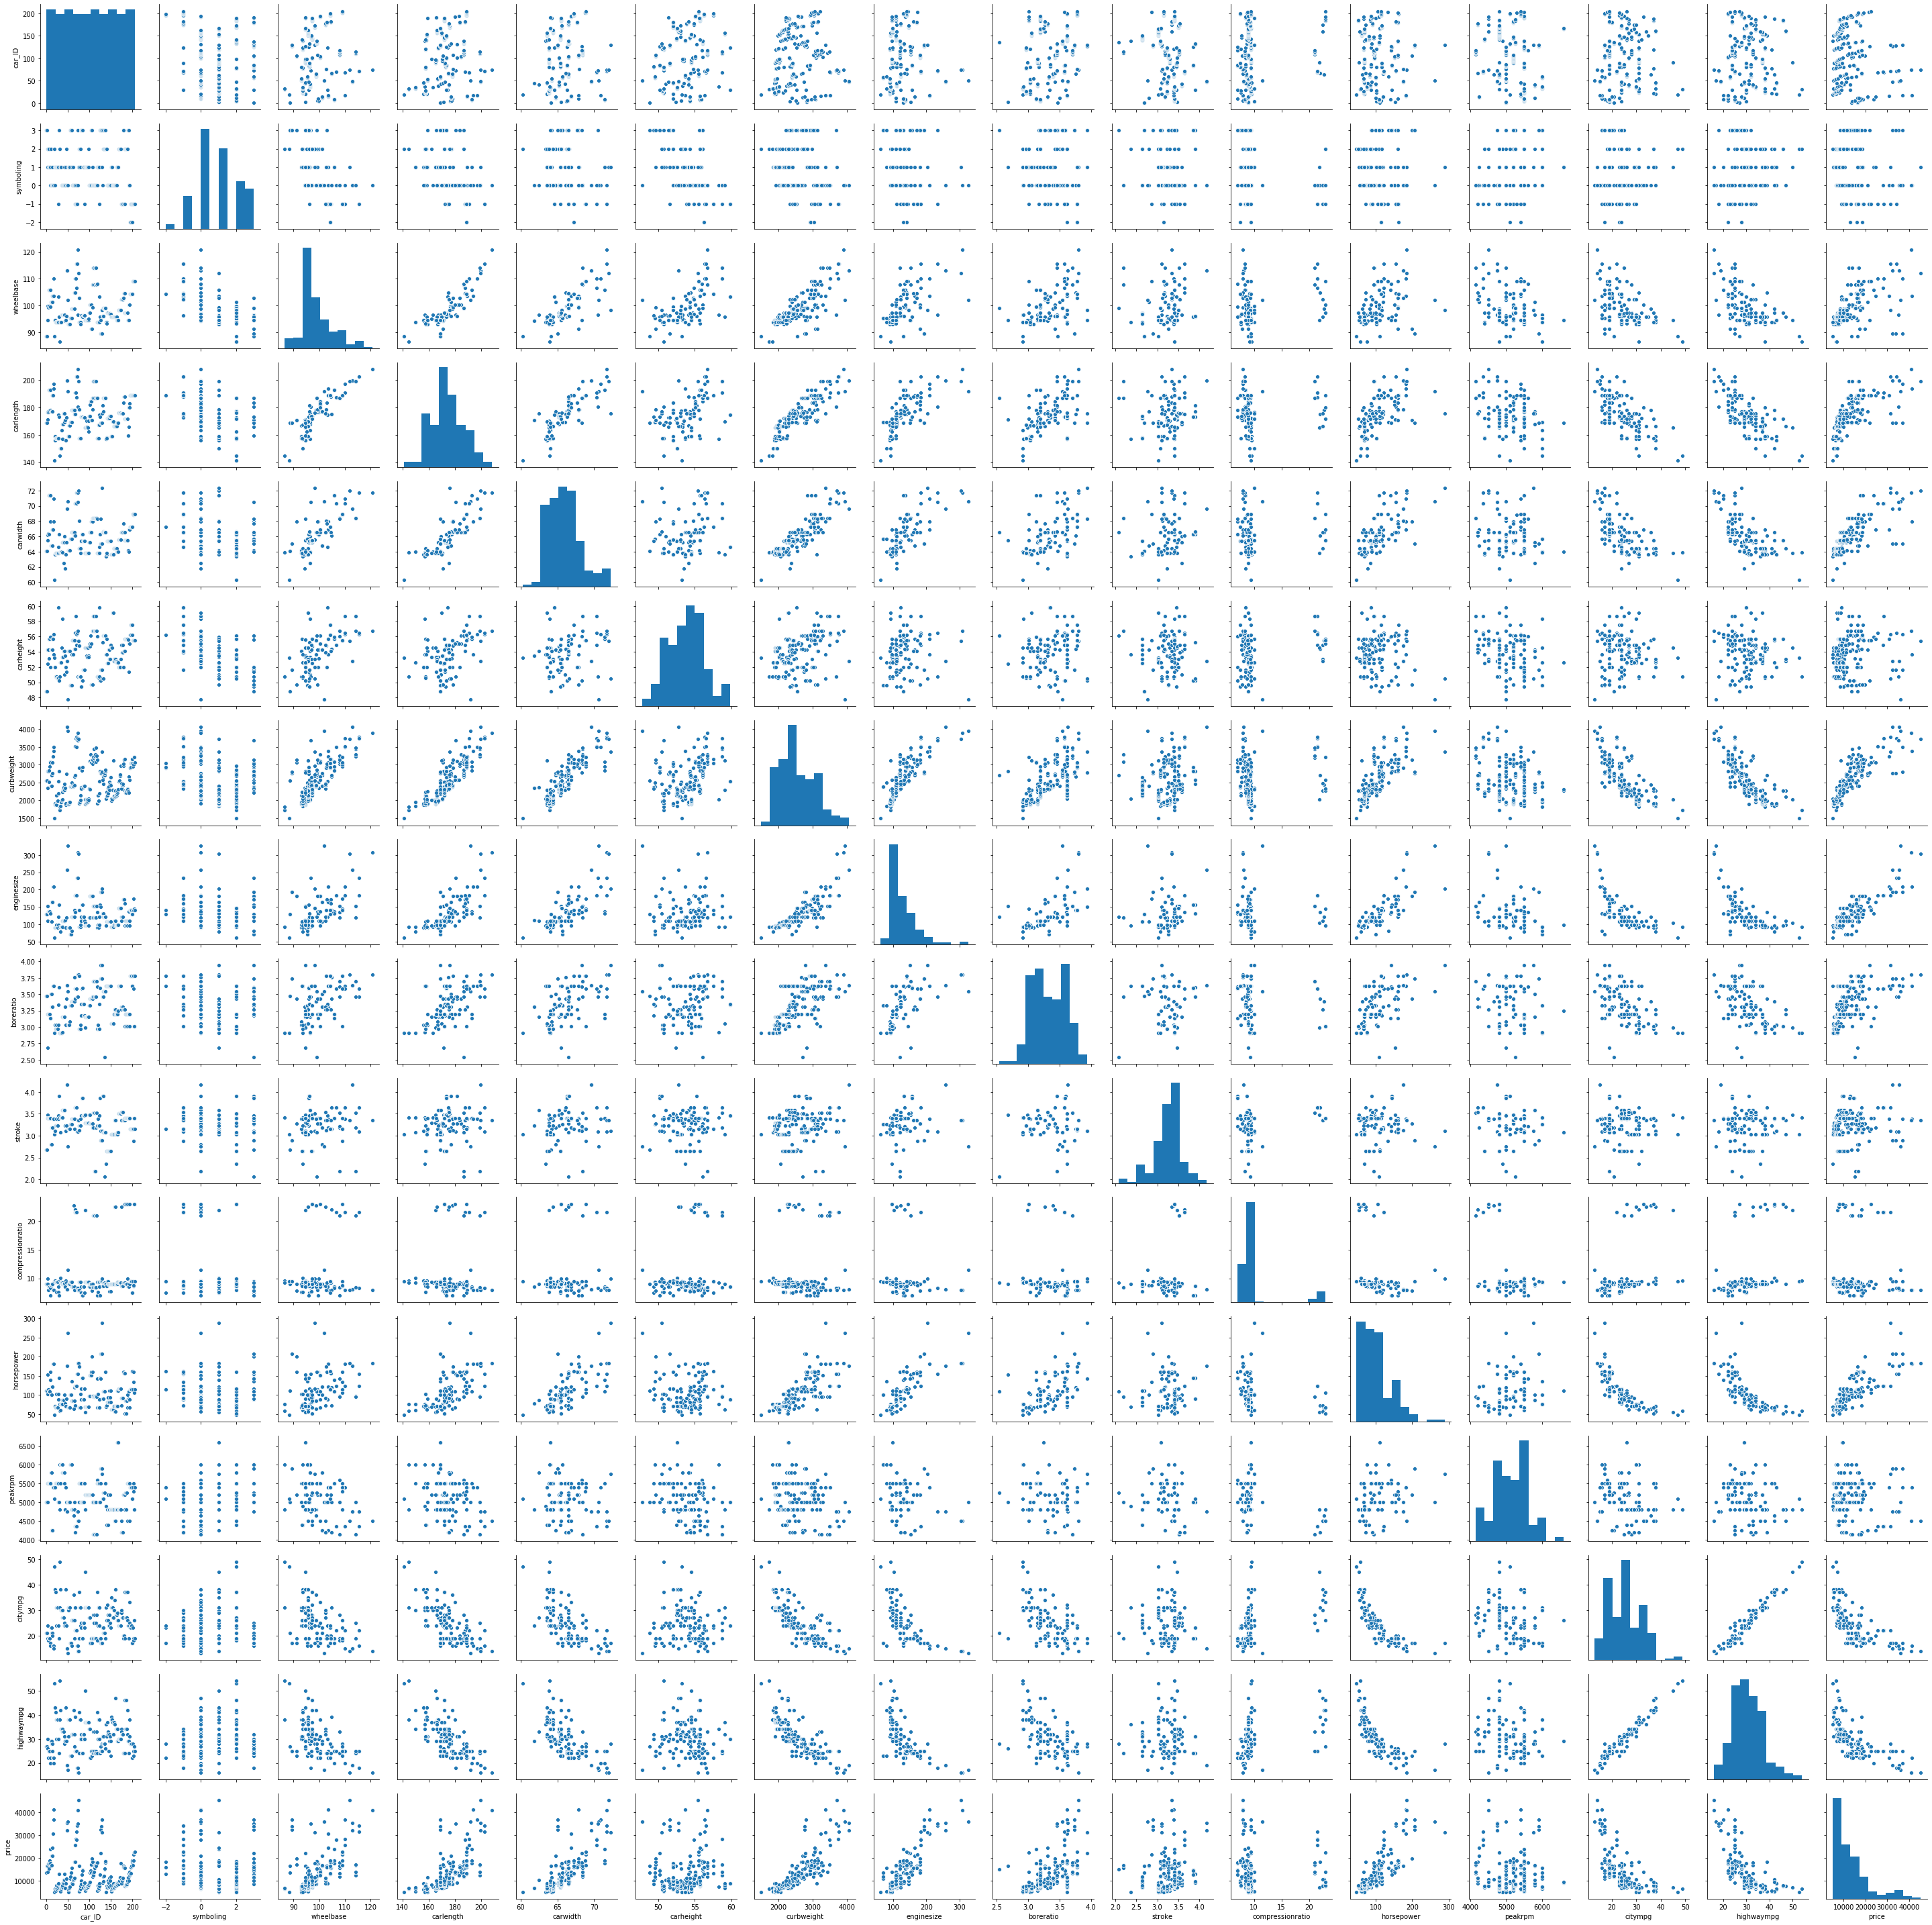

In [5]:
sns.pairplot(dataset)
plt.show()

### Outlier detection
To do outlier detection we use box plot

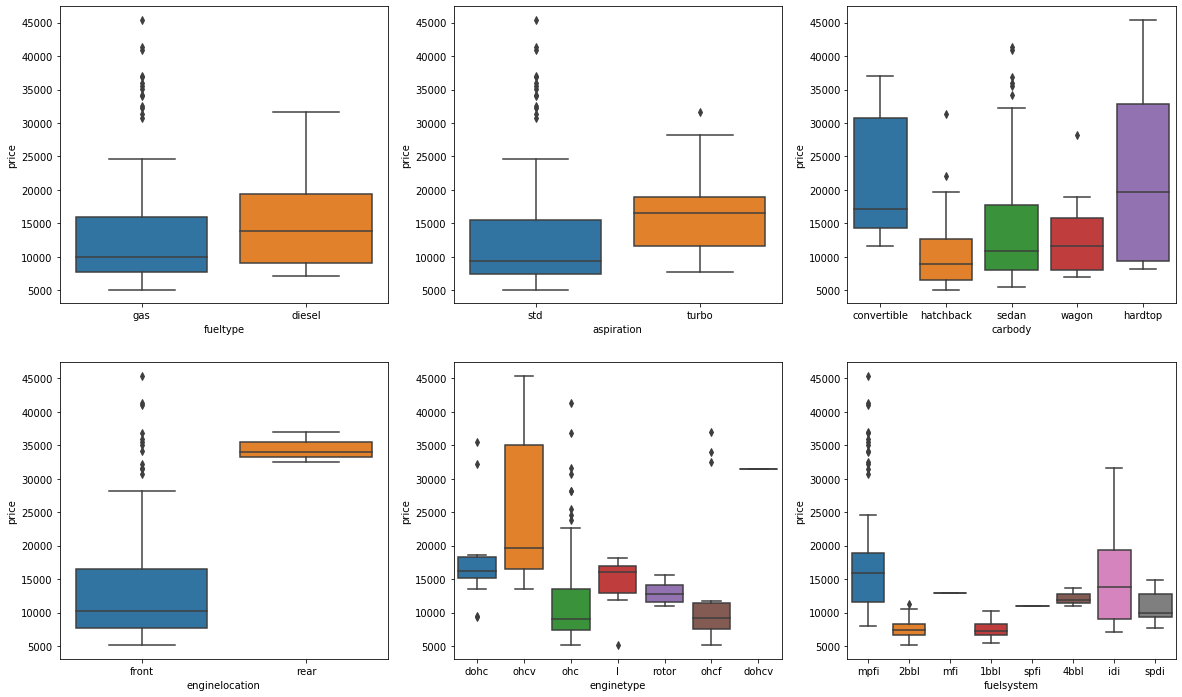

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = dataset)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = dataset)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = dataset)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = dataset)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = dataset)
plt.subplot(2,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = dataset)
plt.show()

In [7]:
dataset = dataset.drop(["car_ID", "CarName"], axis=1)

In [8]:
columns = list(dataset.columns)
for col in columns:
    if dataset[col].dtype == object:
        print(dataset[col].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64


In [9]:
# 2 Category Variables: (Use Binary Encoding)

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
cat_2_cols = ["fueltype", "aspiration", "doornumber", "enginelocation"]
for col in cat_2_cols:
    dataset[col]= label_encoder.fit_transform(dataset[col]) 


In [10]:
# More than 2 Category Variables: (Use Dummy Variables)

cat_3_cols = ["drivewheel", "carbody", "enginetype", "cylindernumber", "fuelsystem"]
for col in cat_3_cols:
    status = pd.get_dummies(dataset[col])
    status = pd.get_dummies(dataset[col], drop_first = True)
    dataset = pd.concat([dataset, status], axis = 1)
    dataset.drop([col], axis = 1, inplace = True)
    


In [11]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


### Dummy Variables

The variable `drivewheel` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

### Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [12]:
#!conda install scikit-learn=0.17  
# !pip3 install sklearn

In [13]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', "enginesize", "boreratio", 
           "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


# Let's check the correlation coefficients to see which variables are highly correlated

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,3,1,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,1,1,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,-1,1,1,0,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.797203,0.909091,0.181818,0.440559,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


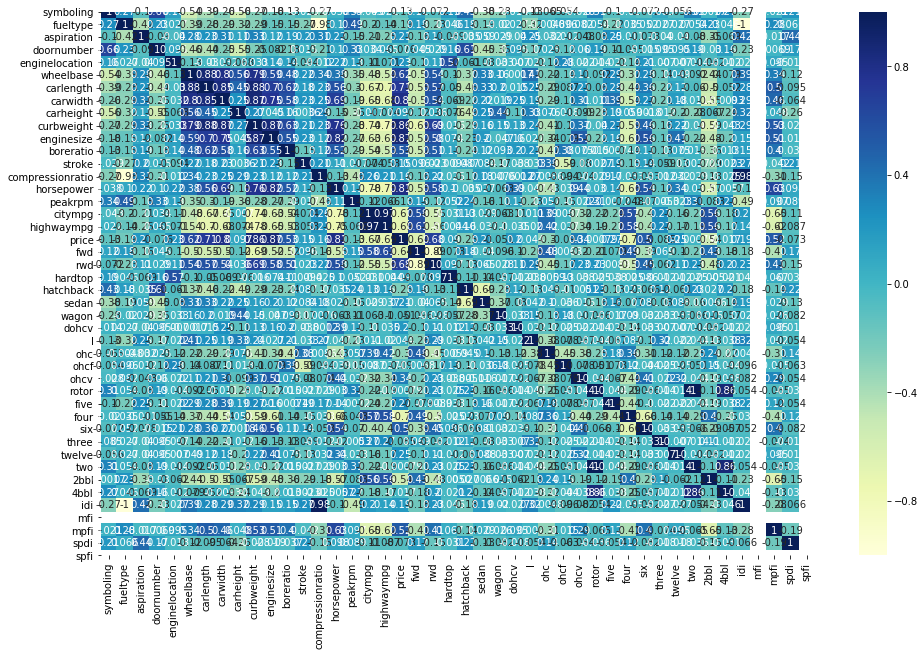

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


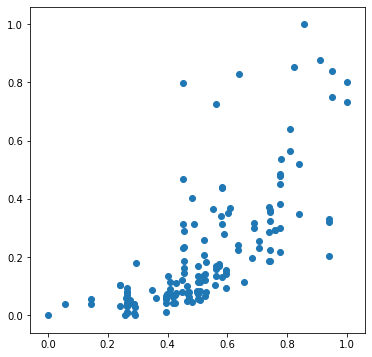

In [17]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.carlength, df_train.price)
plt.show()


### Dividing into X and Y sets for the model building

In [18]:
y_train = df_train.pop('price')
X_train = df_train

In [19]:
X_train = df_train

In [20]:
X_train.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginesize          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
fwd                   uint8
rwd                   uint8
hardtop               uint8
hatchback             uint8
sedan                 uint8
wagon                 uint8
dohcv                 uint8
l                     uint8
ohc                   uint8
ohcf                  uint8
ohcv                  uint8
rotor                 uint8
five                  uint8
four                  uint8
six                   uint8
three                 uint8
twelve                uint8
two                 

## Model Building

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [21]:
typecast_cols = ["fwd", "rwd", "hardtop", "hatchback", "sedan", "wagon", "dohcv", "l", "ohc", "ohcf", "ohcv", "rotor", "five",
"four", "six", "three", "twelve", "two", "2bbl", "4bbl", "idi", "spdi", "spfi", 'mfi', 'mpfi']
for col in typecast_cols:
    X_train[col] = X_train[col].astype('int64')

X_train.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginesize          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
fwd                   int64
rwd                   int64
hardtop               int64
hatchback             int64
sedan                 int64
wagon                 int64
dohcv                 int64
l                     int64
ohc                   int64
ohcf                  int64
ohcv                  int64
rotor                 int64
five                  int64
four                  int64
six                   int64
three                 int64
twelve                int64
two                 

### Adding all the variables to the model

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

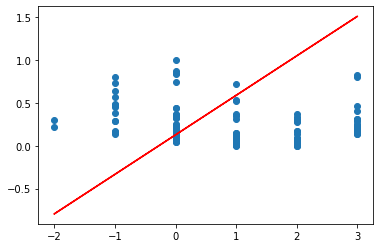

In [22]:
import statsmodels.api as sm
list_cols = ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']

# Add a constant
X_train_lm = sm.add_constant(X_train[list_cols])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [23]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     46.66
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.95e-50
Time:                        23:40:14   Log-Likelihood:                 226.21
No. Observations:                 143   AIC:                            -372.4
Df Residuals:                     103   BIC:                            -253.9
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1166      0.143  

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
35,two,inf
29,rotor,inf
1,fueltype,795.19
38,idi,383.47
13,compressionratio,200.93
10,enginesize,110.45
31,four,106.83
9,curbweight,44.05
17,highwaympg,43.79
16,citympg,42.13


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `2bbl` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [25]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop("2bbl", axis=1)

X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     48.35
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.05e-51
Time:                        23:40:15   Log-Likelihood:                 226.21
No. Observations:                 143   AIC:                            -374.4
Df Residuals:                     104   BIC:                            -258.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1172      0.139  

In [26]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,two,inf
29,rotor,inf
1,fueltype,689.15
37,idi,376.07
13,compressionratio,199.68
10,enginesize,108.97
31,four,106.08
9,curbweight,44.04
17,highwaympg,43.61
16,citympg,41.98


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `2bbl` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [27]:
X_train = X_train.drop("six", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     50.13
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.86e-52
Time:                        23:40:15   Log-Likelihood:                 226.21
No. Observations:                 143   AIC:                            -376.4
Df Residuals:                     105   BIC:                            -263.8
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1174      0.127  

,Features,VIF
34,two,inf
29,rotor,inf
1,fueltype,418.69
36,idi,350.64
13,compressionratio,199.62
10,enginesize,80.73
17,highwaympg,42.65
9,curbweight,42.56
16,citympg,41.46
14,horsepower,36.28


In [28]:
X_train = X_train.drop("idi", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     50.13
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.86e-52
Time:                        23:40:16   Log-Likelihood:                 226.21
No. Observations:                 143   AIC:                            -376.4
Df Residuals:                     105   BIC:                            -263.8
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1285      0.302  

,Features,VIF
29,rotor,inf
34,two,inf
10,enginesize,231.66
1,fueltype,218.55
17,highwaympg,210.68
9,curbweight,199.36
16,citympg,181.89
6,carlength,140.97
14,horsepower,98.01
7,carwidth,94.07


In [29]:
X_train = X_train.drop("mfi", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     50.13
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.86e-52
Time:                        23:40:16   Log-Likelihood:                 226.21
No. Observations:                 143   AIC:                            -376.4
Df Residuals:                     105   BIC:                            -263.8
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1285      0.302  

,Features,VIF
29,rotor,inf
34,two,inf
10,enginesize,231.66
1,fueltype,218.55
17,highwaympg,210.68
9,curbweight,199.36
16,citympg,181.89
6,carlength,140.97
14,horsepower,98.01
7,carwidth,94.07


In [30]:
X_train = X_train.drop("mpfi", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     52.01
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.36e-52
Time:                        23:40:16   Log-Likelihood:                 226.20
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     106   BIC:                            -268.8
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1306      0.299  

,Features,VIF
29,rotor,inf
34,two,inf
10,enginesize,220.41
1,fueltype,217.00
17,highwaympg,206.78
9,curbweight,199.35
16,citympg,177.83
6,carlength,139.77
7,carwidth,93.29
14,horsepower,85.36


In [31]:

X_train = X_train.drop("compressionratio", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     53.99
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.86e-53
Time:                        23:40:16   Log-Likelihood:                 226.18
No. Observations:                 143   AIC:                            -380.4
Df Residuals:                     107   BIC:                            -273.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1780      0.110     -1.

,Features,VIF
33,two,inf
28,rotor,inf
10,enginesize,220.22
16,highwaympg,199.45
9,curbweight,179.56
15,citympg,171.94
6,carlength,128.20
7,carwidth,92.45
13,horsepower,84.45
5,wheelbase,82.77


In [32]:
X_train = X_train.drop("4bbl", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     56.06
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.53e-54
Time:                        23:40:16   Log-Likelihood:                 226.14
No. Observations:                 143   AIC:                            -382.3
Df Residuals:                     108   BIC:                            -278.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1768      0.110     -1.

,Features,VIF
33,two,inf
28,rotor,inf
10,enginesize,219.59
16,highwaympg,199.28
9,curbweight,179.11
15,citympg,171.84
6,carlength,127.97
7,carwidth,92.22
5,wheelbase,82.48
13,horsepower,78.05


In [33]:
X_train = X_train.drop("five", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     58.26
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.38e-55
Time:                        23:40:16   Log-Likelihood:                 226.10
No. Observations:                 143   AIC:                            -384.2
Df Residuals:                     109   BIC:                            -283.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1674      0.102     -1.

,Features,VIF
28,rotor,inf
32,two,inf
16,highwaympg,199.26
10,enginesize,180.00
15,citympg,170.70
9,curbweight,160.04
6,carlength,127.51
7,carwidth,86.94
5,wheelbase,82.18
13,horsepower,72.05


In [34]:
X_train = X_train.drop("l", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     60.57
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.53e-56
Time:                        23:40:17   Log-Likelihood:                 226.03
No. Observations:                 143   AIC:                            -386.1
Df Residuals:                     110   BIC:                            -288.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1662      0.101     -1.

,Features,VIF
27,rotor,inf
31,two,inf
16,highwaympg,196.14
10,enginesize,172.04
15,citympg,166.93
9,curbweight,155.79
6,carlength,118.76
7,carwidth,83.60
5,wheelbase,76.93
13,horsepower,67.75


In [35]:
X_train = X_train.drop("doornumber", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.97
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.24e-57
Time:                        23:40:17   Log-Likelihood:                 225.90
No. Observations:                 143   AIC:                            -387.8
Df Residuals:                     111   BIC:                            -293.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1637      0.101     -1.

,Features,VIF
30,two,inf
26,rotor,inf
15,highwaympg,194.11
9,enginesize,171.29
14,citympg,164.08
8,curbweight,152.91
5,carlength,118.75
6,carwidth,82.68
4,wheelbase,76.81
12,horsepower,67.63


In [36]:
X_train = X_train.drop("dohcv", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     65.51
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.52e-58
Time:                        23:40:17   Log-Likelihood:                 225.76
No. Observations:                 143   AIC:                            -389.5
Df Residuals:                     112   BIC:                            -297.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1710      0.099     -1.

,Features,VIF
29,two,inf
25,rotor,inf
15,highwaympg,187.96
9,enginesize,169.07
14,citympg,162.33
8,curbweight,152.87
5,carlength,102.38
4,wheelbase,76.76
6,carwidth,69.87
10,boreratio,62.47


In [37]:
X_train = X_train.drop("carlength", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     68.22
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.15e-58
Time:                        23:40:17   Log-Likelihood:                 225.60
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     113   BIC:                            -302.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1820      0.097     -1.

,Features,VIF
28,two,inf
24,rotor,inf
14,highwaympg,187.86
8,enginesize,164.06
13,citympg,161.71
7,curbweight,128.67
4,wheelbase,71.83
5,carwidth,67.22
9,boreratio,60.44
10,stroke,58.68


In [38]:
X_train = X_train.drop("curbweight", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     71.11
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.53e-59
Time:                        23:40:17   Log-Likelihood:                 225.44
No. Observations:                 143   AIC:                            -392.9
Df Residuals:                     114   BIC:                            -307.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1601      0.086     -1.

,Features,VIF
27,two,inf
23,rotor,inf
13,highwaympg,186.53
12,citympg,158.21
7,enginesize,116.31
4,wheelbase,68.78
5,carwidth,60.41
8,boreratio,59.85
9,stroke,58.56
10,horsepower,48.41


In [39]:
X_train = X_train.drop("rwd", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     74.13
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.12e-60
Time:                        23:40:17   Log-Likelihood:                 225.20
No. Observations:                 143   AIC:                            -394.4
Df Residuals:                     115   BIC:                            -311.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1441      0.082     -1.

,Features,VIF
26,two,inf
22,rotor,inf
13,highwaympg,184.37
12,citympg,157.98
7,enginesize,114.40
4,wheelbase,61.01
8,boreratio,58.76
5,carwidth,58.49
9,stroke,58.01
10,horsepower,47.98


In [40]:
X_train = X_train.drop("carheight", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     77.26
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.13e-61
Time:                        23:40:17   Log-Likelihood:                 224.85
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     116   BIC:                            -315.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1241      0.077     -1.

,Features,VIF
21,rotor,inf
25,two,inf
12,highwaympg,179.88
11,citympg,152.47
6,enginesize,109.87
5,carwidth,58.32
8,stroke,57.85
7,boreratio,57.67
4,wheelbase,51.51
9,horsepower,47.46


In [41]:
X_train = X_train.drop("citympg", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     80.10
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.47e-62
Time:                        23:40:17   Log-Likelihood:                 224.07
No. Observations:                 143   AIC:                            -396.1
Df Residuals:                     117   BIC:                            -319.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1336      0.077     -1.

,Features,VIF
20,rotor,inf
24,two,inf
6,enginesize,101.96
5,carwidth,58.27
8,stroke,57.61
7,boreratio,53.58
4,wheelbase,51.18
9,horsepower,42.60
15,sedan,40.12
21,four,37.91


In [42]:
X_train = X_train.drop("highwaympg", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     83.72
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.29e-63
Time:                        23:40:18   Log-Likelihood:                 223.72
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     118   BIC:                            -323.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0977      0.060     -1.

,Features,VIF
19,rotor,inf
23,two,inf
6,enginesize,88.09
5,carwidth,56.78
8,stroke,54.75
7,boreratio,46.45
4,wheelbase,45.00
9,horsepower,42.07
1,fueltype,26.19
14,sedan,25.81


In [43]:
X_train = X_train.drop("wagon", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     86.16
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.35e-63
Time:                        23:40:18   Log-Likelihood:                 222.22
No. Observations:                 143   AIC:                            -396.4
Df Residuals:                     119   BIC:                            -325.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1428      0.053     -2.

,Features,VIF
22,two,inf
18,rotor,inf
6,enginesize,81.16
5,carwidth,54.84
8,stroke,46.42
7,boreratio,46.40
9,horsepower,39.22
4,wheelbase,33.10
1,fueltype,25.74
19,four,24.48


In [44]:

X_train = X_train.drop("sedan", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     90.76
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.64e-64
Time:                        23:40:18   Log-Likelihood:                 222.16
No. Observations:                 143   AIC:                            -398.3
Df Residuals:                     120   BIC:                            -330.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1448      0.053     -2.

,Features,VIF
21,two,inf
17,rotor,inf
6,enginesize,81.13
5,carwidth,54.67
7,boreratio,46.36
8,stroke,46.03
9,horsepower,39.19
4,wheelbase,32.67
1,fueltype,25.73
18,four,24.47


In [45]:
X_train = X_train.drop("hardtop", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     94.76
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.08e-65
Time:                        23:40:18   Log-Likelihood:                 221.37
No. Observations:                 143   AIC:                            -398.7
Df Residuals:                     121   BIC:                            -333.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1391      0.052     -2.

,Features,VIF
16,rotor,inf
20,two,inf
6,enginesize,80.08
5,carwidth,54.01
7,boreratio,46.09
8,stroke,45.34
9,horsepower,38.98
4,wheelbase,32.41
1,fueltype,25.73
17,four,24.45


In [46]:
X_train = X_train.drop("wheelbase", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     99.38
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.19e-65
Time:                        23:40:18   Log-Likelihood:                 220.74
No. Observations:                 143   AIC:                            -399.5
Df Residuals:                     122   BIC:                            -337.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1216      0.050     -2.

,Features,VIF
15,rotor,inf
19,two,inf
5,enginesize,73.26
6,boreratio,45.97
7,stroke,45.33
8,horsepower,31.53
4,carwidth,30.24
16,four,24.45
1,fueltype,23.78
9,peakrpm,12.01


In [47]:
X_train = X_train.drop("symboling", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.94e-66
Time:                        23:40:18   Log-Likelihood:                 220.12
No. Observations:                 143   AIC:                            -400.2
Df Residuals:                     123   BIC:                            -341.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1165      0.049     -2.

,Features,VIF
18,two,inf
14,rotor,inf
4,enginesize,72.40
5,boreratio,45.96
6,stroke,44.93
7,horsepower,31.47
3,carwidth,29.22
15,four,24.33
0,fueltype,23.67
8,peakrpm,11.90


In [48]:
X_train = X_train.drop("ohcf", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.94e-67
Time:                        23:40:18   Log-Likelihood:                 218.95
No. Observations:                 143   AIC:                            -399.9
Df Residuals:                     124   BIC:                            -343.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0877      0.045     -1.

,Features,VIF
17,two,inf
13,rotor,inf
4,enginesize,72.33
6,stroke,44.06
5,boreratio,36.45
3,carwidth,29.11
7,horsepower,28.17
14,four,22.78
0,fueltype,19.88
8,peakrpm,11.90


In [49]:
X_train = X_train.drop("fwd", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.51e-67
Time:                        23:40:18   Log-Likelihood:                 217.55
No. Observations:                 143   AIC:                            -399.1
Df Residuals:                     125   BIC:                            -345.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0964      0.045     -2.

,Features,VIF
16,two,inf
12,rotor,inf
4,enginesize,66.99
6,stroke,39.48
5,boreratio,36.29
3,carwidth,28.33
7,horsepower,27.54
13,four,22.78
0,fueltype,18.76
8,peakrpm,11.89


In [50]:
X_train = X_train.drop("horsepower", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.34e-68
Time:                        23:40:18   Log-Likelihood:                 215.46
No. Observations:                 143   AIC:                            -396.9
Df Residuals:                     126   BIC:                            -346.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1163      0.045     -2.

,Features,VIF
15,two,inf
11,rotor,inf
4,enginesize,57.74
6,stroke,39.33
5,boreratio,34.45
3,carwidth,28.31
12,four,18.38
0,fueltype,16.59
7,peakrpm,9.44
9,ohc,7.33


In [51]:
X_train = X_train.drop("hatchback", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.86e-68
Time:                        23:40:19   Log-Likelihood:                 213.91
No. Observations:                 143   AIC:                            -395.8
Df Residuals:                     127   BIC:                            -348.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1205      0.045     -2.

,Features,VIF
10,rotor,inf
14,two,inf
4,enginesize,57.61
6,stroke,38.79
5,boreratio,34.42
3,carwidth,28.30
11,four,18.37
0,fueltype,16.37
7,peakrpm,9.42
8,ohc,7.32


In [52]:
X_train = X_train.drop("fueltype", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     130.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.64e-68
Time:                        23:40:19   Log-Likelihood:                 211.75
No. Observations:                 143   AIC:                            -393.5
Df Residuals:                     128   BIC:                            -349.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1641      0.039     -4.

,Features,VIF
9,rotor,inf
13,two,inf
3,enginesize,54.36
5,stroke,37.82
4,boreratio,34.39
2,carwidth,28.26
10,four,16.44
7,ohc,7.02
6,peakrpm,5.81
12,twelve,2.40


In [53]:
X_train = X_train.drop("four", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.22e-68
Time:                        23:40:19   Log-Likelihood:                 207.92
No. Observations:                 143   AIC:                            -387.8
Df Residuals:                     129   BIC:                            -346.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1036      0.033     -3.

,Features,VIF
9,rotor,inf
12,two,inf
2,carwidth,27.94
3,enginesize,22.95
5,stroke,21.68
4,boreratio,10.46
7,ohc,7.01
6,peakrpm,5.62
0,aspiration,2.09
8,ohcv,1.88


In [54]:
X_train = X_train.drop("rotor", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.22e-68
Time:                        23:40:19   Log-Likelihood:                 207.92
No. Observations:                 143   AIC:                            -387.8
Df Residuals:                     129   BIC:                            -346.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1036      0.033     -3.

,Features,VIF
2,carwidth,27.94
3,enginesize,22.95
5,stroke,21.68
4,boreratio,10.46
7,ohc,7.01
6,peakrpm,5.62
0,aspiration,2.09
8,ohcv,1.88
11,two,1.69
10,twelve,1.61


In [55]:
X_train = X_train.drop("carwidth", axis=1)

# Dropping highly correlated variables and insignificant variables
X = X_train[list(X_train.columns)]
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.19e-65
Time:                        23:40:19   Log-Likelihood:                 196.90
No. Observations:                 143   AIC:                            -367.8
Df Residuals:                     130   BIC:                            -329.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0826      0.035     -2.

,Features,VIF
4,stroke,21.55
2,enginesize,15.42
3,boreratio,8.74
6,ohc,6.88
5,peakrpm,5.24
7,ohcv,1.88
0,aspiration,1.73
10,two,1.60
9,twelve,1.56
11,spdi,1.37


### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

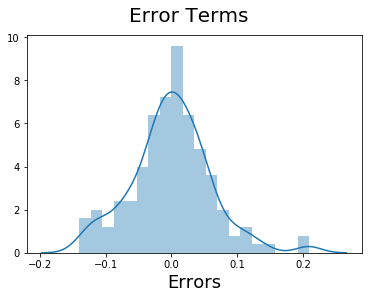

In [56]:
y_train_price = lr_2.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('price')
X_test = df_test
X_test= X_test[list(X_train.columns)]
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4

# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

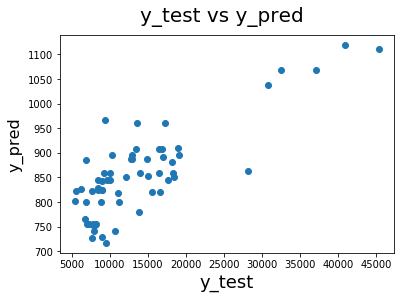

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)


-2.3700094379440237


We can see that the equation of our best fitted line is:

$ price = 0.1321  \times  aspiration + 0.1114  \times  enginelocation + 1.9064 \times enginesize - 0.1283 \times boreratio - 0.4565 \times stroke + 0.1186 \times peakrpm + 0.1216 \times ohc - 0.1455 \times ohcv + 0.2546 \times three - 0.6473 \times twelve + 0.440 \times two -0.1410 \times spdi $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features
2. Build a non-linear model